In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger


Hosts inicializados
Canais inicializados
Pares EPRs adicionados


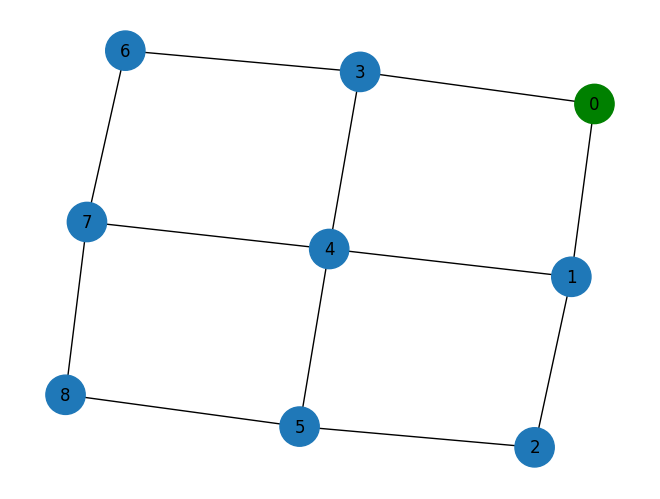

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

2025-04-27 12:37:03,541: Timeslot 0: Iniciando protocolo Andrew Childs entre Alice 6 e Bob 0.
2025-04-27 12:37:03,542: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2025-04-27 12:37:03,544: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2025-04-27 12:37:03,545: Cliente criou 4 qubits para a transmissão.
2025-04-27 12:37:03,546: Qubit 91 registrado no timeslot 0
2025-04-27 12:37:03,546: Qubit 619 registrado no timeslot 0
2025-04-27 12:37:03,547: Qubit 741 registrado no timeslot 0
2025-04-27 12:37:03,548: Qubit 868 registrado no timeslot 0
2025-04-27 12:37:03,549: Qubit 91 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 12:37:03,550: Qubit 619 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 12:37:03,551: Qubit 741 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 12:37:03,552: Qubit 868 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 12:37:03,552: Alice recebeu 4 qubits. Total: 4 qubits na memória.
2025-04-27 12:37:03,553: Instruçõe

Iniciando treinamento QCNN...
Qubits finais no circuito QCNN: 4
Acurácia no teste QCNN: 100.0%
Acurácia no treino QCNN: 94.29%


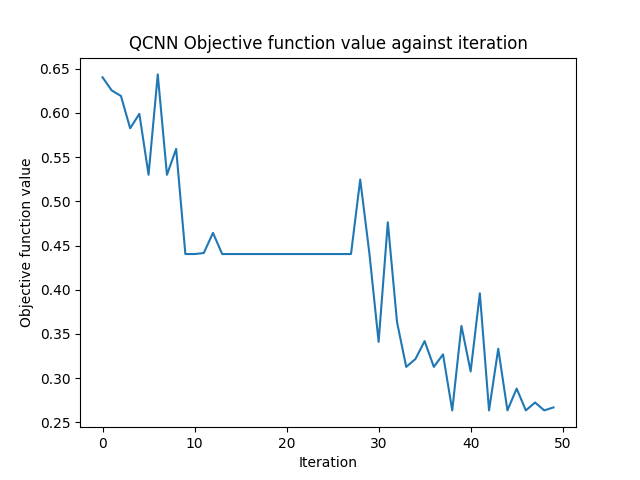

2025-04-27 12:37:18,337: Timeslot 6: Servidor aplicando operações nos qubits.
2025-04-27 12:37:18,337: Timeslot 7: Servidor aplicando operações nos qubits.
2025-04-27 12:37:18,338: Timeslot 8: Servidor aplicando operações nos qubits.
2025-04-27 12:37:18,339: Timeslot 9: Servidor aplicando operações nos qubits.
2025-04-27 12:37:18,339: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-04-27 12:37:18,340: Qubit 91 após operações de Servidor - Estado: 1, Fase: 1
2025-04-27 12:37:18,340: Qubit 619 após operações de Servidor - Estado: 0, Fase: 1
2025-04-27 12:37:18,340: Qubit 741 após operações de Servidor - Estado: 1, Fase: -1
2025-04-27 12:37:18,341: Qubit 868 após operações de Servidor - Estado: 1, Fase: -1
2025-04-27 12:37:18,341: Limpando a memória do cliente antes de receber os qubits devolvidos.
2025-04-27 12:37:18,342: Usando a rota fornecida: [0, 3, 6]
2025-04-27 12:37:18,342: Etapa de retorno: consumindo EPRs existentes na rota [0, 3, 6].
2025-04-27 12:37:18,3

Tempo de Operação: 4


In [3]:
# quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=4, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=4,scenario=1,circuit_depth=4,modelo_qml="qcnn")